<a href="https://colab.research.google.com/github/garestrear/Curso_de_Python/blob/master/Sesion5/S5_Explorando_Bitcoin_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/Sesion5/S5_Bitcoin.png)

#**Sesión 5 Bitcoin**

Hola Ninja, en esta clase aprenderás, de manera general, como funciona la red de Bitcoin y como extraer información usando Python.  

##**Sistema monetario digital**

¿Qué es?

Un sistema montetario es  un conjunto de reglas, procedimientos e instituciones mediante los cuales se crea dinero en una economía. El dinero sirve como medio de pago (de intercambio) por cualquier bien o servicio. El tipo más común de sistema monetario actualmente es  el basado en dinero fiduciario (Piense en el peso colombiano, dolar americano, ...).

Un sitema monetario **digital** es un sistema donde el dinero es electrónico (o digital). El dinero electrónico no tiene una unidad física y su uso es mediante el intercambio de bits (no de billetes).


Mayor reto: **doble gasto**

El problema del doble gasto se refiere a la posibilidad de gastar más de una vez el dinero digital (los mismos bits). Si es posible crear esta moneda digital, se podrían crear copias con el fin de gastar el mismo dinero más de una vez. Este problema, en apariencia sencillo, es el gran reto de cualquier sistema monetario digital.

##**Centralizado**

En un sistema centralizado existe una autoridad central que administra y controla todo el sistema. 

Propiedades:
- La autoridad central administra los datos de todos los usuarios. 
- Todas las transacciones son registradas y almacenadas.
- Costos por transacción y administración en el sistema monetario.

Problemas: 
- Riesgos de exposición de datos de los usuarios.
- Riesgos de corrupción de la autoridad central. 

Dado que hay un administrador central de toda la información, éste se encarga de registrar todas las transacciones del sistema y llevar registro de ellas. De ésta manera evita el doble gasto.



**Sistema centralizado vs descentralizado**

![texto alternativo](https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/Sesion5/centralization_vs_decentralization-smaller.png)

##**Descentralizado**

En un sistema descentralizado son los mismos usuarios del sistema monetario quienes emiten el dinero y controlan las transacciones en el sistema. 

Propiedades:
- Usa técnicas criptográficas para velar por la seguridad del sistema.
- Menores costos por transacción.
- Menores riesgos de corrupción dentro del sistema.

Problemas:
- Alta volatilidad en el precio de las criptomonedas.
- La naturaleza de algunas criptomonedas se presta para transacciones ilegales.

Reto principal: **Como evitar el doble doble gasto**

En en caso del Bitcoin existe algo como un "libro contable" público y descentralizado. Dado que el "libro contable" es público, cada transacción es verificada por los mismos usarios del sistema. Al libro contable se le llama cadena de bloques (**blockchain**).

#**Bitcoin:Primera solución pública y eficiente al problema de doble gasto**

<center> <img src="https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/Sesion5/S6_white_paper.png" width="700" height="500" align="center"/></center>

Usaremos la librería `blockchain`para consultar el precio del Bitcoin.

**Debes correr la siguiente celda**

In [ ]:
!pip install blockchain

  Created wheel for blockchain: filename=blockchain-1.4.4-cp36-none-any.whl size=11511 sha256=e799f28ec816035d521c57b8e604aa8549eaa0b7ebc519837a1cafe8577699de
  Stored in directory: /root/.cache/pip/wheels/6e/d9/4f/65e76bdafa4f3a950c679c9d999664c604b33077b0a9d014e8
Successfully built blockchain


Para consultar el valor **actual** del Bitcoin en dólares estadounidenses ejecuta la siguiente celda de código.

In [ ]:
import blockchain
from blockchain import exchangerates
# Obtener precio de un Bitcoin en varias monedas
ticker = exchangerates.get_ticker()
#Precio actual de un Bitcoin en dolares norteamericanos 
#print(ticker['USD'])
ticker['USD'].p15min

12107.36

***Tu turno:*** Define una función que tome una cantidad de Bitcoins y regrese su valor en pesos colombianos y en pesos mexicanos.
- Un dólar equivale a aproximadamente 3760 pesos colombianos.
- Un dólar equivale a aproximadamente 22 pesos mexicanos.

In [ ]:
##  Defina una función convertir() que toma n Bitcoins y devuelve el valor en pesos colombianos y mexicanos
B = ticker['USD'].p15min  ## B es el precio de un Bitcoin en dólares americanos  
def convertir(__):
  """ Convertimos b Bitcoins a pesos colombianos y mexicanos """
  c = _____  ## valor de n bitcoins en pesos colombianos 
  m = _____  ## valor de n bitcoins en pesos mexicanos 
  print(___) ' Bitcoins equivalen a ', c, ' colombianos y ', m, ' mexicanos.')
convertir(2) ## Da el precio de 2 Bitcoins en pesos colombianos y mexicanos +

##**1. Función Hash (Criptográfica)**

En términos generales, una **función hash** es una función $h$ que transfoma cualquier secuencia de ceros y unos en una secuencia de longitud fija. Esta función se dice además *criptográfica*, si es computacionalmente inviable encontrar dos sequencias $x_1$, $x_2$ tales que $h(x_1) = h(x_2)$.

Una hash usada en Bitcoin es **SHA-256** (Secure Hash Algorithm)

**SHA-256** arroja sequencias de longitud 256 (en bits).


***Tu turno:*** Instala las librerías `pycrypto` y `bitstring`.

In [ ]:
!pip install -q pycrypto
!pip install -q bitstring

     |████████████████████████████████| 450kB 2.8MB/s 
     |████████████████████████████████| 204kB 2.8MB/s 


***Tu turno:*** Ejecuta las siguientes celdas de código.

In [ ]:
from Crypto.Hash import SHA256
hash = SHA256.new()

In [ ]:
mensaje = b'Soy un Ninja'
hash.update(mensaje) # aplicamos la función SHA256 a mensaje
valor_hash_bytes = hash.digest() # da el valor, en bytes, de la función aplicada a mensaje
print(valor_hash_bytes)
len(valor_hash_bytes)

b'\x13\x9er\xcaF\xaf\x7f\xdc\x97lhl*y\x83M\xb9L\xb8;\xe9\xd3\x11\xb0\x1eyX\x8e\r\xd6~\xbb'


32

En la siguiente celda de código vamos a imprimir la correspondiente cadena de bits (**0's y 1's**). ¡Ejecútala!

In [ ]:
from bitstring import Bits
hash_value_bits = Bits(bytes = valor_hash_bytes).bin
print(hash_value_bits)
print(len(hash_value_bits))

0001001110011110011100101100101001000110101011110111111111011100100101110110110001101000011011000010101001111001100000110100110110111001010011001011100000111011111010011101001100010001101100000001111001111001010110001000111000001101110101100111111010111011
256


**Observación sobre las funciones Hash criptográficas**: Notarás que los mensajes de la siguiente celda solo difieren por una misma letra escrita en mayúscula en uno y en minúscula en el otro. ¿Qué pasa cuándo los escribimos en binario?

In [ ]:
### Veamos dos mensajes parecidos en binario
mensaje1 = b'Soy un Ninja'
mensaje2 = b'soy un Ninja' #solo cambia la primera S a s
print(Bits(bytes = mensaje1).bin)
print(Bits(bytes = mensaje2).bin)  ##Representación binaria de mensaje2
print(len(Bits(bytes = mensaje1).bin))

010100110110111101111001001000000111010101101110001000000100111001101001011011100110101001100001
011100110110111101111001001000000111010101101110001000000100111001101001011011100110101001100001
96


Ahora aplicamos **SHA-256** a `mensaje1` y a `mensaje2`. Imprimiremos el valor de la hash en **hexadecimal**, para esto usamos el método   `hex()`. ¿Qué pasa cuando aplicamos **SHA-256**?

In [ ]:
### ¿Cómo transforma SHA-256 los mensajes? ###
hash.update(mensaje1)
hash_bytes_m1 = hash.digest()
hash.update(mensaje2)
hash_bytes_m2 = hash.digest()
print(hash_bytes_m1.hex())
print(hash_bytes_m2.hex())

AttributeError: ignored

Nota que aunque `mensaje1`y `mensaje2`son muy similares, eso no se refleja en el valor al aplicar el hash **SHA-256**.

***Tu turno:***  En la siguiente celda de códido calcula el hash, usando la función hash `RIPEMD160`, de todos los valores de la siguiente lista: 

`Lista = [b'Hola', b'hola', b'holA', b'ola', b'holaa']`

Para aplicar la función hash `RIPEMD160` usamos el siguiente código
```
hashR = RIPEMD.new() ##llamamos la función RIPMED160
hashR.update(---) ## Aplicamos la función hash a ---
Valor_hash =hashR.digest()
```     

¡Debes imprimir secuencias hexadecimales!

In [ ]:
##**************************** Completa el siguiente código****************************##
from Crypto.Hash import RIPEMD
Lista = [b'Hola', b'hola', b'holA', b'ola', b'holaa']
def ripemd(----):
  _________ ##llamamos la función RIPMED160
  _________ ## Aplicamos la función hash a ----
  _________ ## Tomamos el output de la función
  return(______) ## Transformar el digest a hexadecimal
print(list(map(ripemd,Lista))) # Aplicamos la función ripemd a cada elemento en Lista 

SyntaxError: ignored

***Tu turno (pero para después)***: Desde la imagen de una hash no se puede saber la preimagen. 


---


***Reto:*** Encuentra una preimagen en **hexadecimal**, bajo la función **SHA-256**, de la secuencia: 

`c7f639f83031eb3ca1ec6bb600d9b67c5b478822a1e1cade9803cd562349df6f`

***Pista:*** Una de las preimágenes tiene 6 bytes y es interés común de todos nosotros en éste curso.



In [ ]:
##***************************Escribe aquí tu código***************************##


##**2. Firmas digitales**

Una firma digital se puede considerar como una versión electrónica de la firma que plasmamos constantemente en documentos físicos. Un **esquema** de firmas digítales consta de los siguientes elementos:
- Un algoritmo de generación de contraseñas. El algoritmo genera dos contraseñas: una privada  y una pública. 
- Un algoritmo para firmar. El algoritmo recibe  un mensaje $M$ (de hecho un hash del mensaje), la llave privada y arroja otra cadena de bits, $M_f$, que se considera el mensaje firmado.
- Un algoritmo de verificación. Este algoritmo recibe  el  mensaje $M$, el mensaje firmado $M_f$ y la llave pública. El objetivo es  verificar la validez de la firma. 

<center> <img src="https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/Sesion5/digital-signatures.jpg" width="700" height="500" align="center"/></center>

Existen varios esquemas de firmas digitales, en particular, **ECDSA** es el esquema de firmas usado por Bitcoin.

**secp256k1** Es la curva elíptica usada por Bitcoin (probablemente esto no es importante en este contexto).

Usaremos la librería `bitcoin` para explorar las firmas digitales usadas en los protocolos criptográficos  del Bitcoin. Empecemos instalándola usando el comando `!pip install -q bitcon`.

In [ ]:
!pip install -q bitcoin
from bitcoin import * # Con esta línea importamos todas las funciones de la librería

ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

Los siguientes comandos de la libería `bitcoin`se usan para generar llaves y firmar.
- `llave_priv = random_key()` genera la llave privada. 
- `llave_pub = privtopub(llave_priv)` genera la llave pública asociada.
- `firmado = ecdsa_sign(mensaje, llave_priv)` firma el mensaje usando el esquema ECDSA.

In [ ]:
####    Se generan las llaves que usaremos en adelante     ###
llave_priv = random_key() # Se genera la llave privada 
llave_pub = privtopub(llave_priv) # Se genera la llave pública asociada a la llave privada
print(llave_pub)


04cd0bcf4e5e6085f062c56409879752de14efa67529123e87c703f2bfa24284d0bae1944c152a4f623a3dcec53130e9d1d193279c13ec807a1132773945398fb1


En este momento tenemos nuestras llaves. Ahora veamos la firma de un mensaje:

In [ ]:
mensaje = b'Anel transfiere 10 Bitcoins a Natalia' # Mensaje que se quiere firmar
men_fir = ecdsa_sign(mensaje,llave_priv) # Firmamos el documento con ECDSA
print(men_fir) # Imprimimos el mensaje firmado

HLG8sMTxY1Zp1v1epugxiDWFXrnkxJtSJaPWZrp05pxAF0YHB/XB0tvQbArQY84ZoHEKoGZtT9Bnv0CwPMZFu1Y=
fff28dfe6d7bc87dd7a7dcb6c62d0ea4553578256c371c9f4a561dde7d0c2bf5


Ya tenemos firmado nuestro mensaje, ahora **¿Cómo un tercero puede verificar la validez de la firma?** 
- `ecdsa_verify(mensaje,men_fir,llave_pub)` verifica la firma. 
- `ecdsa_recover(mensaje,men_fir)` nos ayuda a recuperar la llave pública desde un mensaje firmado.

In [ ]:
#ecdsa_recover(mensaje,men_fir)
ecdsa_verify(mensaje,men_fir,llave_pub)

True

**¡Si el mensaje fuera manipulado tendría que ser detectado!**


In [ ]:
## Veamos que una pequeña manipulación del mensaje firmado es detectada
mensaje_falso = '-------'
ecdsa_verify(mensaje,mensaje_falso,llave_pub)

False

#**3. Direcciones en la red de Bitcoin**
Una dirección es la identificación del usuario en la red de Bitcoin. Cada llave privada tiene asociada una dirección de Bitcoin. Usando la librería `bitcoin` podemos obtener la dirección asociada a nuestras llaves.
- `privtoaddr (llave_priv) ` genera la dirección desde la llave privada.
- `pubtoaddr(llave_pub) ` genera la dirección desde la llave pública.




In [ ]:
## Generamos la dirección de Bitcoin asociada a nuestra clave privada 
Mi_direccion = privtoaddr(llave_priv)
print(Mi_direccion)

1QGi5ujR3jk4Kn2auNojXSVL99B6bARFwG


***Tu turno:*** Verifique si la dirección obtenida con el comando `pubtoaddr(llave_pub)` es igual a `Mi_direccion`.

In [ ]:
## Digite su código para verificar si las direcciones son iguales


True


## **Explorando direcciones de Bitcoin**

Usaremos la librería `blockcyper` para explorar la red de Bitcoin
ref: https://www.blockcypher.com/dev/bitcoin/#introduction

**Ejecuta primero la siguiente celda de código**



In [ ]:
!pip install -q blockcypher
import blockcypher as bc

Las siguientes direcciones (entre muchas otras) son atribuidas a *Satoshi Nakamoto*. 

- `12c6DSiU4Rq3P4ZxziKxzrL5LmMBrzjrJX`

- `1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa`

Veamos qué saldo tienen estas cuentas

- `bc.get_total_balance('direccion')` nos da el saldo de `direccion`.

In [ ]:
bc.get_total_balance('1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa')

1833529005

El número anterior es enorme. Además, nunca habrá mas de 21 millones de Bitcoins en el mercado (así fue diseñado).

La unidad mínima en que se puede subdividir un Bitcoin se llama **Satoshi** y corresponde a $10^{-8}$  Bitcoin. 

El número que vemos arriba está dado en Sathoshis. Transformemos ésto a bitcoins y usemos nuestra función de arriba para ver su balance en pesos colombianos y mexicanos.

In [ ]:
def Sat_to_Bit(s):
  B= s/10**8
  return(B)
print(Sat_to_Bit(1833521657))

18.33521657


Con el siguiente comando podemos obtener el mismo resultado de la función de arriba ``bc.satoshis_to_btc()``

Podemos además ver cuántas transacciones ha tenido una dirección de la red
- `bc.get_total_num_transactions('direccion') `

In [ ]:
bc.get_total_num_transactions('1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa')
#bc.satoshis_to_btc(1833521657)

2477

Pero....**¿Qué es una transacción?**

#**4. Transacciones**

En términos generales, una **transacción** es un documento digital que certifica la transferencia de algunos bitcoins desde una(s) cuenta(s) de origen (emisor(es)) hasta una(s) cuenta(s) de destino (receptor(es)).

*Una transferencia contiene:*

Una **identificación** la cual es un doble hash de un documento conteniendo la información de los siguientes incisos:

1.   **Entradas (inputs):** Indentificación de **transacciones anteriores** donde el emisor obtuvo los bitcoins que quiere transferir. 

2.   **Salidas (outputs):** dirección(es) de las cuentas de los receptores de los bitcoins.

3.   **Certificado de auntenticidad:** Contiene la firma digital del documento que contiene la información de los item 1 y 2 para cada entrada. Además, contiene la llave pública de la entrada correspondiente.




###*1. Identificación*: 

La idendentificación de una transacción `tx` es el doble hash de la información contenida en ella. 

Exploraremos la transacción con identificación:
`5e5d0206bee05b83fa58aa013ea67f6835eef7c3216039ff9fd5b4abd4209e2d`

In [ ]:
tx = bc.get_transaction_details('5e5d0206bee05b83fa58aa013ea67f6835eef7c3216039ff9fd5b4abd4209e2d')

Una transacción es un diccionario para python

In [ ]:
type(tx)

dict

In [ ]:
tx.keys()

dict_keys(['block_hash', 'block_height', 'block_index', 'hash', 'addresses', 'total', 'fees', 'size', 'preference', 'relayed_by', 'confirmed', 'received', 'ver', 'double_spend', 'vin_sz', 'vout_sz', 'confirmations', 'confidence', 'inputs', 'outputs'])

###*2. Entradas*

Cada entrada de `tx` contiene información de la  dirección que emite bitcoins en `tx` y la identificación de la transacción de donde obtuvo los bitcoins que va a transferir en `tx`. 

Para visualizar la información de las entradas de una transacción `tx` usamos `tx['inputs']`


In [ ]:
entradas = tx['inputs']
#print(entradas)

In [ ]:
for i in range(len(entradas)):
  print('La entrada {} con identificación {}'.format(i, entradas[i]['addresses'][0]))
  print('Aporta los {} BTC '.format(entradas[i]['output_value']*10**-8))
  print('Recibidos en la transacción {}\n'.format(entradas[i]['prev_hash']))

La entrada 0 con identificación 1G8jDp2P6oKSCMtQAZzpJT2dyo7tN61fpa
Aporta los 0.02075262 BTC 
Recibidos en la transacción 3085853b647032dc12c5c7d96ec50458a431935ac4ffd11e563e329729fbdcf2

La entrada 1 con identificación 1G8jDp2P6oKSCMtQAZzpJT2dyo7tN61fpa
Aporta los 0.18677364 BTC 
Recibidos en la transacción 800fd3f4534cfac3613322022d2bc6f9783d473ff1cb07ef8729c811319adf6f

La entrada 2 con identificación 1HYyAJaZMxaWUvqmMwFaZpyW9yqXKH2bjE
Aporta los 0.01957834 BTC 
Recibidos en la transacción eff5c045514dec091749e515c27b7230835ffe1cf67b7da5997bbc0be5e946c6



###*3. Salidas*

Cada salida de la transacción `tx` es una dirección de bitcoin y tiene asociado un valor a recibir. 

In [ ]:
salidas = tx['outputs']
for i in range(len(salidas)):
  print('La salida {} con dirección {} recibió {} BTC'.format(i,salidas[i]['addresses'][0],10**(-8) * salidas[i]['value']))

La salida 0 con dirección 1LpEjncyqxyWVmcHpDn8zLQP41TrE9h6o4 recibió 0.0181002 BTC
La salida 1 con dirección 1NrqoTGu9wgDwrZ42M5XFWcKB57QR9N6jU recibió 0.2089 BTC


###*4. Certificado de auntenticidad*

Cada entrada de la transacción `tx` adjunta su llave pública y  la firma digital de documento que certifica la transferencia que dicha entrada aporta a la transacción. 

In [ ]:
for i in range(len(entradas)):
  print(entradas[i]['script'])

483045022100acc61e124c26a8cfe9c6970fb2ffaa9cf999cb117ba23274be84263713ea1fae0220186a503dc6180e9e25dc6132a3c9bf1c84cc1188f307058337886381f70e0ad901210385c8c5a44d8ac1b34c8f87535d0b3071e224b84c635e2e843a80e67ef0098912
4730440220054eac2b4b91caac9bb5489e2d853a37cff66a96ad8ba6298f46859def4b1b7602207259d343288dd6c7548ee3120cd8901c459dfbb6865cb0fed977bdbff69c461001210385c8c5a44d8ac1b34c8f87535d0b3071e224b84c635e2e843a80e67ef0098912
47304402204131f31f45830ff59a10391788a84f8fd6e9ff03f81510ad107e148808e8bac3022056d5f5d17bb0017f17b4378760862d708c15af85f7b88a5870fe7045fb5b45da012103b06c25d32f062f06e1a1e519a3d9896cade73275677923d0428404656e6c0d78


***Tu turno:*** Sigue los siguientes pasos
- Crea una lista vacía `llaves`.
- Genera 20 llaves privadas de la red de Bitcoin y guardalas en `llaves`. 
- Obten las direcciones de red de Bitcoin asociadas a tus llaves.
- Imprima el saldo de cada una de las direcciones.
Si encuentras algunos Bitcoins (o satoshis) debes **invitar cerveza a todo el grupo**.

**Recuerda** que para agregar el elemento `a` a una lista `lista` usamos `lista.append(a)`

In [ ]:
 ### ------- Buscando Bitcoins ----------###
 

In [ ]:
print(llaves)


##**Número de transacciones por segundo en la red** 


La red de Bitcoin realiza en promedio entre 2 y 5 transacciones por segundo, mientras que VISA realiza 1700 transacciones por segundo.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
tran_per_sec = pd.read_csv('https://raw.githubusercontent.com/garestrear/Curso_de_Python/master/Sesion5/S5_transactions-per-second')
tran_per_sec['Timestamp'] = pd.to_datetime(tran_per_sec['Timestamp'])
tran_per_sec.set_index('Timestamp', inplace=True)
tran_per_sec.head()

,transactions-per-second
Timestamp,
2016-06-11 00:00:00,1.983333
2016-06-12 00:15:00,1.750000
2016-06-13 00:30:00,2.000000
2016-06-14 00:45:00,2.716667
2016-06-15 01:00:00,2.583333


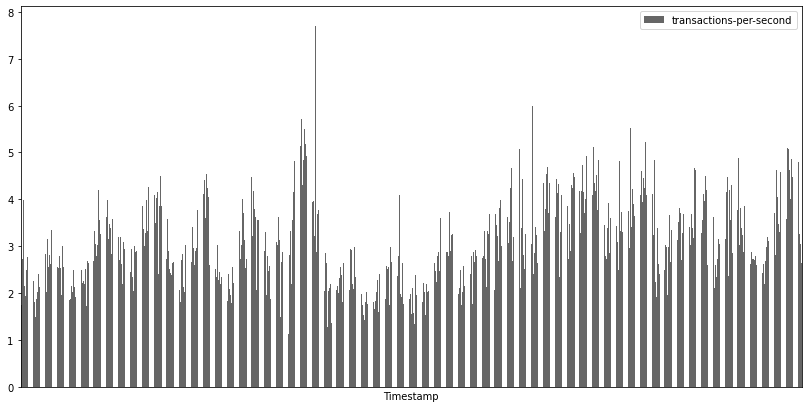

In [ ]:
tran_per_sec.plot(figsize =(14,7), kind = 'bar', color = 'k', alpha=0.6,xticks = [], width=0.6)
plt.show()

#**5. Bloques y la Blockchain**



Un **bloque** es un arhivo que contiene un grupo de transacciones.

Los bloques se guardan de manera ordenada (encadenada) en la **Blockchain**.

Un bloque contiene 4 características principales:

1.   **Indentificación o hash:** es el hash de un documento que contiene toda la información del bloque, además cumple con la *prueba de trabajo* 
2.   **Dificultad:**  contiene el nivel de dificultad de la prueba de trabajo.
3.   **Altura:** el orden que el bloque tiene en la Blockchain
4.   **Hash bloque anterior:** La identificación del bloque con altura igual a una unidad menor. 


Importemos la librería `blockcypher` para obtener información de los bloques. 

Analicemos el bloque con altura `641085` 



In [ ]:
import blockcypher as bc

Para cargar información del bloque de altura 12 utilizamos: `bc.get_block_overview('12')`

###***Tu turno:*** Carga en la variable `bloque` la información del bloque de altura `641085`.

In [ ]:
#***********************Escribe aquí tu código***********************# 
bloque =

###***Tu turno:*** averigua que tipo de objeto contiene la variable `block`.

In [ ]:
#***********************Escribe aquí tu código***********************# 


###**Tu turno:** imprima `block`.

In [ ]:
#***********************Escriba aquí tu código***********************# 


Un ------ tiene asociados dos *métodos* `keys` (llaves ó etiquetas) y values `values` (valores). 

El código `block.keys()` devuelve todas las llaves del diccionario `block`.

El código `block.values()` devuelve todas los valores del diccionario `block`.

###***Tu turno:*** ejecuta las dos siguientes celdas de código.

In [ ]:
bloque.keys()

In [ ]:
bloque.values()

Como `block` es un diccionario ponemos acceder a sus valores usando sus llaves.

**Ejemplo:** el código `block['hash']` imprimer el valor de `block` asociado a la llave `'hash'`, es decir, el hash del bloque `block`.

###***Tu turno:*** ejecuta la siguiente celda de código.

In [ ]:
block['hash']

###***Tu turno:*** imprime la áltura del bloque.

###***Tu turno:*** imprime el total del bloque. 

###***Tu turno:*** imprime el hash del bloque previo.

###**Tu turno:** imprime los "bits" del bloque.

###***Tu turno:*** imprime el nounce del bloque.

Con lo aprendido puedes generar el siguiente documento que contiene información sobre el bloque.

In [ ]:
print('Caracteristicas del bloque: \n')
print('Hash: {} '.format(bloque['hash']))
print('Enumeración: {} '.format(bloque['height']))
print('Hash bloque anterior: {} '.format(bloque['prev_block']))
print('Número de transacciones: {}'.format(bloque['n_tx']))
print('Total bitcoins tansferidos: {}'.format(bloque['total']))
a = hex(bloque['bits'])
print('Dificualtad del bloque: {}'.format(int(a[4:],16) * 2**(8*(int(a[:4],16) - 3))))
print('Nonce del bloque: {}'.format(bloque['nonce']))

##**Convirtiendo hexadecimal a decimal con Python**

Para convertir un número cadena '23abf03' hexadecimal a decimal con Python usamos: `int('23bf03',16)` 

In [ ]:
int('23bf03', 16)

Esto quiere decir que el número `2342659` se codifica en hexadecimal como `23bf03`.

#**Minería**

Minar un bloque implica encontrar un número `nonce` tal que el hash del bloque cumpla la prueba de trabajo.

##**Prueba de trabajo**

Un bloque **cumple la prueba de trabajo** si su hash (visto como un entero) es menor que la **dificultad de establecida por la red** en el momento que el bloque fue minado. Es decir si,

$$\text{Hash del bloque } \leq \text{ Dificultad}$$ 

Detalles dificultad de un bloque: https://en.bitcoin.it/wiki/Difficulty

***Tu turno:*** Verifica que el bloque `641085` satisface la prueba de trabajo suponiendo que su hash `0000000000000000000e4ef063d951cc2216789f62f613b0ca4e4b294aa162a1` es correcto. 


In [ ]:
##******************************Escribe aquí tu código******************************##


##**La Blockchain**

La cadena de bloques o Blockchain es simplemente un archivo conteniendo todos los bloques creados.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

bc_size = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_blockchain-size')
bc_size['Timestamp'] = pd.to_datetime(bc_size['Timestamp'])
bc_size.set_index('Timestamp', inplace=True)
#Detalles de como graficar: más adelante.
bc_size.plot(figsize = (12,5))
plt.ylabel('MB')
plt.show()

#**6. Gráficos de Bitcoin con Pandas**

Para leer los datos usaremos la librería `pandas`, en particular la función `read_csv` esta función se usa para leer archivos `.csv`. 

Los datos usados son extraídos de: 
1. https://www.blockchain.com/es/charts

2. https://www.coindesk.com/price/bitcoin


***Tu turno:*** importa la librería pandas

In [ ]:
import pandas as pd

##**Precio**

Importemos la base de datos con la información del precio de bitcoin.

In [ ]:
price = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_market-price_2013-09-30_2020-08-02-CoinDesk.csv')

Para ver las primeras y últimas 5 filas usamos `price.head()` y `price.tail()`. 

In [ ]:
price.head()

In [ ]:
price.tail()

##**Graficando DataFrames usando Matplotlib: forma indirecta**

Para graficar una columna del DataFrame `price` podemos simplemente definir los las lista `x` e `y` para luego usar una función de `pyplot`, por ejemplo, `plt.plot(x,y)`. 

Grafiquemos la columna `24h Open (USD)` del DataFrame `price`:

In [ ]:
y = price['24h Open (USD)'].values
print(y)
x = list(price.index)
print(x)

In [ ]:
plt.plot(x,y)
plt.show()

##**Forma directa** 

Podemos graficar directamente la columna llamada `col` de un DataFrame `df` usando el código `df['col'].plt()`.

In [ ]:
#Grafica la columna '24h Open (USD)' del DataFrame price
price['24h Open (USD)'].plot()
plt.show()

***Tu turno:*** Grafica cualquier otra columnda del DataFrame `price`. Intenta cambiar el color, intensidad del color y tamaño de la figura.

**Ayuda:** Para ver el nombre de las columnas ejecuta:  `price.columns`.

In [ ]:
#********************Escribe tu código aquí********************#


**Reto (Comparte tu solución en el foro):** Usar la base de datos `price` para construir el gráfico (diario) de **velas japonesas** de Bitcoin. 

In [ ]:
price.head()

###**Índice vs Columna**

In [ ]:
fig = plt.figure(figsize=(15,10))
price['24h Low (USD)'].plot(color = [[0.2,0.1,0.5]], label ='Precio mínimo')
plt.ylabel('USD', fontsize=16)
plt.legend()
plt.show()

Para graficar desde la fila `a` hasta la fila `b` usamos `price['24h High (USD)'][a:b]`

In [ ]:
#Graficamos desde la fila 20 hasta la 200
figu = plt.figure(figsize=(10,7))
price['24h High (USD)'][20:200].plot(color ='blue',  label ='Hey')
plt.show()

##**Datetime como índice**

Ahora veremos lo ventajoso que puede ser tener un objeto de tiempo como nuetro índice.

Convirtamos la columna `'Date'` a nuestro índice

In [ ]:
price.index = price['Date']
price.head()

En la siguiente celda se define la columan de índices como un objeto de tiempo `datetime`

In [ ]:
price.index = pd.to_datetime(price.index)

Ahora podemos obtener gráficas del precio en el tiempo que queramos.

Por ejemplo: 
1. `price['Closing Price (USD)']['2019-6':'2020-3'].plot()` muestra  la gráfica de  `'Closing Price (USD)'` desde `2019-6` (junio de 2019) hasta `2020-03` (marzo de 2020). 

2. `price['Closing Price (USD)']['2018'].plot()` muestra la gráfica del precio en 2018.

In [ ]:
plt.figure(figsize=(10,6))
price['Closing Price (USD)']['2019-6':'2020-3'].plot(color='k', alpha = 0.5)
#price['Closing Price (USD)']['2018'].plot(color='purple', alpha = 0.8)
plt.ylabel('USD')
plt.show()

Gráfico del precio de cierre de Bitcoin en marzo de 2018.

In [ ]:
plt.figure(figsize=(10,6))
price['Closing Price (USD)']['2018-3'].plot()
plt.show()

##**Arreglo de gráficas con datos desde un DataFrame**

Hay dos maneras directas de construir un arreglo de gráficas desde  un data frame:

**La primera:**

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(18,12), sharey=True)
#Precio 2017
ax[0,0].plot(price['Closing Price (USD)']['2017'], color = 'blue')
ax[0,0].set_title('Price 2017' )
ax[0,0].set_xticklabels(['Ene', 'Mar', 'May',  'Jul','Sep',  'Nov', 'Ene'])
#precio 2018
ax[0,1].plot(price['Closing Price (USD)']['2018'], color = 'green')
ax[0,1].set_title('Price 2018' )
ax[0,1].set_xticklabels(['Ene', 'Mar', 'May',  'Jul','Sep',  'Nov', 'Ene'])
#precio 2019
ax[1,0].plot(price['Closing Price (USD)']['2019'], color = 'black')
ax[1,0].set_title('Price 2019' )
ax[1,0].set_xticklabels(['Ene', 'Mar', 'May',  'Jul','Sep',  'Nov', 'Ene'])
#precio 2020
ax[1,1].plot(price['Closing Price (USD)']['2020'], color = 'purple')
ax[1,1].set_title('Price 2020' )
plt.show()

**La segunda:**

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(18,12), sharey=True)
#Precio 2014
price['Closing Price (USD)']['2017'].plot(color ='blue', ax = ax[0,0])
price['Closing Price (USD)']['2018'].plot(color ='green', ax = ax[0,1])
price['Closing Price (USD)']['2019'].plot(color ='black', ax = ax[1,0])
price['Closing Price (USD)']['2020'].plot(color ='purple', ax = ax[1,1])
plt.show()

##**Mempool**

La **mempool** es el lugar donde todas las transacciones válidas esperan para ser confirmadas. Cada minero de la red de Bitcoin tiene una mempool.  

Veamos gráficamente su importancia.


In [ ]:
mem = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_mempool-count')
mem.head()

In [ ]:
mem['Timestamp'] = pd.to_datetime(mem['Timestamp'])
mem.set_index('Timestamp', inplace=True)
mem.head()

##**Número de hashes por segundo (Hash Rate)**

Data continene el número diario estimado de terahashes por segundo en la red Bitcoin.

In [ ]:
hash_rate = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_hash-rate')
hash_rate['Timestamp'] =pd.to_datetime(hash_rate['Timestamp'])
hash_rate.set_index('Timestamp', inplace=True)
hash_rate.head()

##**Costo de comisión (promedio) de una transacción**

Valor de comsión en dólares a pagar en promedio por una transacción

In [ ]:
fee_per_tran = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_fees-usd-per-transaction')
fee_per_tran['Timestamp'] = pd.to_datetime(fee_per_tran['Timestamp'])
fee_per_tran.set_index('Timestamp', inplace=True)
fee_per_tran.head()

##**Tiempo promedio de confirmación de una transacción**

Es el tiempo promedio que tarda una transacción en ser incluida en un bloque.

In [ ]:
time_con_tran = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_median-confirmation-time')
time_con_tran['Timestamp'] = pd.to_datetime(time_con_tran['Timestamp'])
time_con_tran.set_index('Timestamp', inplace=True)
time_con_tran.head()

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (18,9))
mem['2017':'2018-6'].plot(ax = axs[0,0])
axs[0,0].set_ylabel('Número de transacciones')
axs[0,0].set_xlabel('')
axs[0,0].set_title('Tamaño mempool')

hash_rate['2017':'2018-6'].plot(ax = axs[0,1])
axs[0,1].set_ylabel('Terahashes por segundo')
axs[0,1].set_xlabel('')
axs[0,1].set_title('Tasa de hashes')

fee_per_tran['2017':'2018-6'].plot(ax = axs[1,0])
axs[1,0].set_ylabel('USD')
axs[1,0].set_xlabel('')
axs[1,0].set_title('Precio promedio de transacciones')

time_con_tran['2017':'2018-6'].plot(ax = axs[1,1])
axs[1,1].set_ylabel('USD')
axs[1,1].set_xlabel('')
axs[1,1].set_title('Tiempo medio de confirmación')
plt.show()

## **Mapa de correlaciones** 

In [ ]:
print((mem.index.min(),mem.index.max()))
print((hash_rate.index.min(),hash_rate.index.max()))
print((fee_per_tran.index.min(),fee_per_tran.index.max()))
print((time_con_tran.index.min(),time_con_tran.index.max()))

In [ ]:
data_1 = mem.merge(hash_rate, how='inner', left_index=True, right_index=True)
data_1.head()

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
m_corr = data_1.corr() 

sn.heatmap(m_corr, annot=True)
plt.show()

##**¿Existe correlación entre el volumen de transacciones y el precio de Bitcoin?**

In [ ]:
trade_vol = pd.read_csv('https://github.com/garestrear/Curso_de_Python/blob/master/Sesion5/S5_trade-volume')
trade_vol ['Timestamp'] = pd.to_datetime(trade_vol ['Timestamp'])
trade_vol.set_index('Timestamp', inplace=True)
trade_vol.head()

In [ ]:
trade_vol['2017':'2020'].plot(figsize=(16,6))
plt.ylabel('USD')
plt.show()

In [ ]:
data_2 = price[['Closing Price (USD)']].merge(trade_vol, how='inner', left_index=True, right_index=True)
data_2.head()

In [ ]:
m_corr = data_2.corr() 
sn.heatmap(m_corr, annot=True)
plt.show()